# Data: Lake Michigan Waves

https://data.cityofchicago.org/Parks-Recreation/Beach-Water-Quality-Automated-Sensors/qmqz-2xku

Can we predict wave height based on wave period (time between waves)?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("waves.csv")
df.head()

Beach Name   Measurement Timestamp  Water Temperature  Turbidity  \
0  Ohio Street Beach  06/02/2019 05:00:00 PM               17.1       0.78   
1  63rd Street Beach  09/18/2013 10:00:00 AM               18.9       7.56   
2  63rd Street Beach  06/12/2014 12:00:00 PM               25.4       3.45   
3  63rd Street Beach  06/12/2014 01:00:00 PM               18.1       3.31   
4  63rd Street Beach  06/12/2014 02:00:00 PM               17.5       2.93   

   Transducer Depth  Wave Height  Wave Period  Battery Life  \
0               NaN        0.232          4.0          10.9   
1             1.517        0.140          4.0          11.0   
2            -0.072        0.031          9.0          12.2   
3             1.818        0.339         10.0          12.2   
4             1.545        0.136          4.0          12.2   

  Measurement Timestamp Label               Measurement ID  
0          06/02/2019 5:00 PM  OhioStreetBeach201906021700  
1         09/18/2013 10:00 AM  63rdStreetBeach201309181000  
2         06/12/2014 12:00 PM  63rdStreetBeach201406121200  
3          06/12/2014 1:00 PM  63rdStreetBeach201406121300  
4          06/12/2014 2:00 PM  63rdStreetBeach201406121400

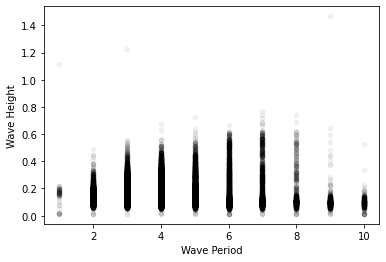

In [3]:
df = df[(df["Wave Period"] > 0) & (df["Wave Height"] > 0)]
df.plot.scatter(x="Wave Period", y="Wave Height", color="k", alpha=0.05)
# observation: non-linear relationship

In [4]:
beach_names = sorted(set(df["Beach Name"]))
beach_names

['63rd Street Beach',
 'Calumet Beach',
 'Montrose Beach',
 'Ohio Street Beach',
 'Osterman Beach',
 'Rainbow Beach']

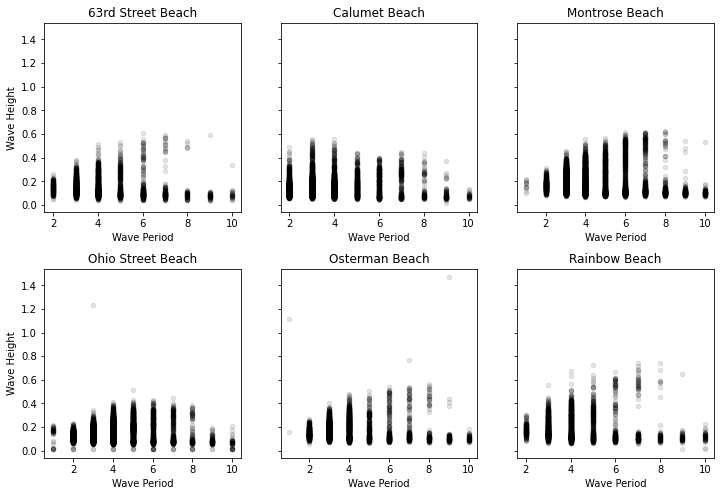

In [5]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8), sharey=True)
plt.subplots_adjust(hspace=0.3)
axes = list(axes.reshape(-1))
for b in beach_names:
    ax = axes.pop(0)
    ax.set_title(b)
    beach_df = df[df["Beach Name"] == b]
    beach_df.plot.scatter(x="Wave Period", y="Wave Height", 
                          color="k", alpha=0.1, ax=ax)
# Obversation: beaches have distinct patterns (use OneHot encoding)

# Four Models

1. wave period (linear)
2. wave period (polynomial)
3. beach
4. beach and wave period

In [6]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.compose import make_column_transformer
train_df, test_df = train_test_split(df)
train_df.head()

Beach Name   Measurement Timestamp  Water Temperature  \
33973      Rainbow Beach  08/14/2015 12:00:00 AM               23.3   
38127  Ohio Street Beach  07/12/2019 07:00:00 PM               22.4   
20832  Ohio Street Beach  07/06/2015 12:00:00 AM               20.0   
5509       Calumet Beach  08/26/2014 12:00:00 PM               24.0   
17501     Montrose Beach  08/13/2016 12:00:00 PM               22.0   

       Turbidity  Transducer Depth  Wave Height  Wave Period  Battery Life  \
33973       0.94               NaN        0.109          3.0          11.0   
38127       1.34               NaN        0.167          5.0          11.1   
20832       1.91               NaN        0.095          2.0          10.9   
5509        0.39             1.668        0.080          4.0           9.9   
17501       0.00               NaN        0.153          5.0          11.6   

      Measurement Timestamp Label               Measurement ID  
33973         08/14/2015 12:00 AM     RainbowBeach201508142400  
38127          07/12/2019 7:00 PM  OhioStreetBeach201907121900  
20832         07/06/2015 12:00 AM  OhioStreetBeach201507062400  
5509          08/26/2014 12:00 PM     CalumetBeach201408261200  
17501         08/13/2016 12:00 PM    MontroseBeach201608131200

In [7]:
m1 = LinearRegression()
scores = cross_val_score(m1, train_df[["Wave Period"]], train_df["Wave Height"], cv=10)
scores.mean(), scores.var()

(0.0010276413330550516, 3.901629905987456e-06)

In [8]:
m2 = Pipeline([
    ("poly", PolynomialFeatures(include_bias=False)),
    ("lr", LinearRegression()),
])
scores = cross_val_score(m2, train_df[["Wave Period"]], train_df["Wave Height"], cv=10)
scores.mean(), scores.var()

(0.04547815670217734, 3.732693580166755e-05)

In [9]:
m3 = Pipeline([
    ("oh", OneHotEncoder()),
    ("lr", LinearRegression()),
])
scores = cross_val_score(m3, train_df[["Beach Name"]], train_df["Wave Height"], cv=10)
scores.mean(), scores.var()

(0.05224516465681165, 4.848403331960965e-05)

In [10]:
m4 = Pipeline([
    ("both", make_column_transformer((OneHotEncoder(), ["Beach Name"]),
                                     (PolynomialFeatures(), ["Wave Period"]))),
    ("lr", LinearRegression()),
])
scores = cross_val_score(m4, train_df[["Beach Name", "Wave Period"]], train_df["Wave Height"], cv=10)
scores.mean(), scores.var()

(0.09216326587523901, 9.585434770827013e-05)

In [11]:
m4.fit(train_df[["Beach Name", "Wave Period"]], train_df["Wave Height"])
m4.score(test_df[["Beach Name", "Wave Period"]], test_df["Wave Height"])

0.09413200646128006

In [12]:
def plot_beach(name, ax):
    df = pd.DataFrame({
        "Beach Name": name,
        "Wave Period": np.arange(1, 11, 1),
    })
    df["predicted_wave"] = p.predict(df)
    ax = df.plot.line(x="Wave Period", y="predicted_wave",
                      label=name, ax=ax)
    return ax

ax = None
for name in beach_names:
    ax = plot_beach(name, ax)
ax.set_ylabel("Wave Height (Meters)")

NameError: name 'p' is not defined

In [ ]:
train[xcols]

In [ ]:
oh = OneHotEncoder()
data = oh.fit_transform(train[["Beach Name", "Wave Period"]].values)
oh.get_feature_names(["beach", "wave"])

In [ ]:
pd.DataFrame(data.toarray(), columns=oh.get_feature_names(["beach"]))

In [ ]:
ct = make_column_transformer(
    (OneHotEncoder(), ["Beach Name"]),
    (PolynomialFeatures(include_bias=False), ["Wave Period"]),
    (PolynomialFeatures(include_bias=False), ["Wave Period"]),
)
data = ct.fit_transform(train[["Beach Name", "Wave Period"]])
pd.DataFrame(data, columns=ct.get_feature_names())

In [ ]:
pipe = Pipeline([
    ("trans", ct),
    ("lr", LinearRegression())
])
pipe.fit(train[["Beach Name", "Wave Period"]], train["Wave Height"])
pipe.score(test[["Beach Name", "Wave Period"]], test["Wave Height"])

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(pipe, train[["Beach Name", "Wave Period"]], train["Wave Height"], cv=10)
scores.mean()

In [ ]:
scores

In [ ]:
def plot_beach(name, ax):
    df = pd.DataFrame({
        "Beach Name": name,
        "Wave Period": np.arange(1, 11, 1),
    })
    df["predicted_wave"] = pipe.predict(df)
    ax = df.plot.line(x="Wave Period", y="predicted_wave",
                      label=name, ax=ax)
    return ax
    
ax = None
for name in beach_names:
    ax = plot_beach(name, ax)
ax.set_ylabel("Wave Height (Meters)")